In [49]:
import numpy as np
import random
random.seed(10)
def generer_matrice_adjacence(taille,typeDeGraphe):
    matrice = np.empty((taille, taille))              
    
    if(typeDeGraphe == 'Complete'):               
        for i in range(taille):
            for j in range(i,taille):
                valeur = 1 if i!=j else 0 
                matrice[i][j] = valeur
                matrice[j][i] = valeur
    else:
         for i in range(taille):
            for j in range(i,taille):
                valeur = random.randint(0,1)  if i!=j else 0
                matrice[i][j] = valeur
                matrice[j][i] = valeur
    return matrice

matriceAdjacence = generer_matrice_adjacence(8, "Not-Complete")
print(matriceAdjacence)

print("\n \n")     

matriceAdjacence = generer_matrice_adjacence(8, "Complete")
print(matriceAdjacence)

[[0. 0. 1. 1. 0. 0. 1. 1.]
 [0. 0. 1. 0. 0. 1. 1. 0.]
 [1. 1. 0. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 0. 1. 1. 0.]
 [0. 1. 0. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 0. 0. 1. 0. 1. 0. 0.]]

 

[[0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0.]]


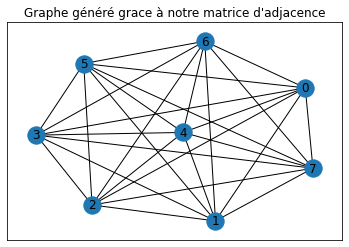

In [50]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
random.seed(10)
G = nx.Graph(matriceAdjacence, nodetype=int)
plt.title("Graphe généré grace à notre matrice d'adjacence")
nx.draw_networkx(G)

In [51]:
random.seed(10)
def lister_voisins(matriceAdjacence):
   
    taille = len(matriceAdjacence.T)
    voisins = []
    i=0
    while (i <= taille-1):
        for j in range(taille):
            if(matriceAdjacence[i][j] != 0 and matriceAdjacence[j][i] != 0):
                voisins.append(j)
        print("Les voisins du sommet", i, "sont :",voisins)
        voisins.clear()
        i+=1
        
lister_voisins(matriceAdjacence)

Les voisins du sommet 0 sont : [1, 2, 3, 4, 5, 6, 7]
Les voisins du sommet 1 sont : [0, 2, 3, 4, 5, 6, 7]
Les voisins du sommet 2 sont : [0, 1, 3, 4, 5, 6, 7]
Les voisins du sommet 3 sont : [0, 1, 2, 4, 5, 6, 7]
Les voisins du sommet 4 sont : [0, 1, 2, 3, 5, 6, 7]
Les voisins du sommet 5 sont : [0, 1, 2, 3, 4, 6, 7]
Les voisins du sommet 6 sont : [0, 1, 2, 3, 4, 5, 7]
Les voisins du sommet 7 sont : [0, 1, 2, 3, 4, 5, 6]


In [52]:
random.seed(10)
def generer_matrice_pondere(matrice):
    for i in range(len(matrice.T)):
        for j in range(i,len(matrice.T)):
            if(matrice[i][j] != 0):
                valeur = random.randint(0, 999)
                matrice[i][j] = valeur
                matrice[j][i] = valeur
    return matrice

matricePondere = generer_matrice_pondere(matriceAdjacence)
print(matricePondere)

[[  0. 585.  33. 439. 494. 591.  15. 211.]
 [585.   0. 473. 832. 503. 843. 284. 669.]
 [ 33. 473.   0. 830. 164.  35. 533. 501.]
 [439. 832. 830.   0. 335.  77. 255. 975.]
 [494. 503. 164. 335.   0. 975. 763. 369.]
 [591. 843.  35.  77. 975.   0.  45. 430.]
 [ 15. 284. 533. 255. 763.  45.   0. 880.]
 [211. 669. 501. 975. 369. 430. 880.   0.]]


In [53]:
import random
random.seed(10)
def generate_time_window(matrice):
    timeWindow = {}
    for i in range(len(matrice)):
        timeOne = random.randint(0,4*len(matrice))
        timeTwo = random.randint(timeOne,4*len(matrice))
        timeWindow[i] = tuple([timeOne,timeTwo])
    timeWindow[0] = tuple([0,max(max(timeWindow.values()))+ random.randint(0,len(matrice))])
    timeWindow[len(matrice)] = timeWindow[0]
    return timeWindow
print(generate_time_window(matricePondere))


{0: (0, 37), 1: (30, 32), 2: (0, 13), 3: (29, 32), 4: (17, 22), 5: (2, 18), 6: (31, 32), 7: (4, 11), 8: (0, 37)}


In [60]:
random.seed(10)

# Cette fonction routourne une solution initiale (structure dictionnaire)
def generate_solution(matrice):
    sol = {}
    matriceSearch = [i for i in range(len(matrice))]
    matriceSearch.remove(0)
    i = 1
    while (len(matriceSearch) > 0):
        way = []
        way.append(0)
        for j in range(0,random.randint(1,len(matrice)-4)) :
            if len(matriceSearch) > 0 :
                value = random.choice(matriceSearch)
                way.append(value)
                matriceSearch.remove(value)
            else: 
                break
        way.append(0)
        sol[i] = way
        i += 1
    return sol

solution_initiale = generate_solution(matricePondere)
print("La solution initiale So : ", solution_initiale)

# Cette fonction routourne toutes les posobilitées de pemutation d'une liste
def Swap_list(solution):
    listeVoisins = [solution]
    voisinage = solution
    if (len(solution) <= 3):
        return solution

    for i in range(len(solution)):
        for j in range(i+1,len(solution)):
            if (voisinage[i] == 0 or voisinage[j] ==0) :
                continue
            voisinage = solution.copy()
            voisinage[i], voisinage[j] = voisinage[j],  voisinage[i]
            listeVoisins.append(voisinage)
    return listeVoisins

listeVoisins  = Swap_list([1, 2, 3, 4, 5, 6, 7])


import pprint
# Cette fonction routourne tous les voisinage de la solution initiale (dictionaire de voisinage)
def generate_voisinage(sol):
    vosinage_solution = {}

    for i in range(len(sol)):
        vosinage_solution[i+1] = Swap_list(list(sol.values())[i])
        
    return vosinage_solution


vosinage_solution = generate_voisinage(solution_initiale)

pp = pprint.PrettyPrinter()
print("Le voisinage de la solution initiale : ")
pp.pprint(vosinage_solution)


La solution initiale So :  {1: [0, 4, 0], 2: [0, 6, 1, 3, 5, 0], 3: [0, 7, 2, 0]}
Le voisinage de la solution initiale : 
{1: [0, 4, 0],
 2: [[0, 6, 1, 3, 5, 0],
     [0, 1, 6, 3, 5, 0],
     [0, 3, 1, 6, 5, 0],
     [0, 5, 1, 3, 6, 0],
     [0, 6, 3, 1, 5, 0],
     [0, 6, 5, 3, 1, 0],
     [0, 6, 1, 5, 3, 0]],
 3: [[0, 7, 2, 0], [0, 2, 7, 0]]}


In [74]:

# Cette fonction retourne le meilleur voisinage pour une liste de voisins
def meilleurVoisin(listeVoisins, matricePondere):
    meilleurVoisin = []
    meilleurCout = 0
    for voisin in range(len(listeVoisins)):
        cout = 0
        if isinstance(listeVoisins[voisin], int):
            for elm in range(len(listeVoisins)-1):
                i = listeVoisins[elm]
                j = listeVoisins[elm+1]
                cout = cout + matricePondere[i-1][j-1]
                meilleurVoisin = listeVoisins
                meilleurCout = cout
        else:
            for elm in range(len(listeVoisins[voisin])-1):
                i = listeVoisins[voisin][elm]
                j = listeVoisins[voisin][elm+1]
                cout = cout + matricePondere[i-1][j-1]
                if(len(meilleurVoisin) == 0):
                    meilleurVoisin = listeVoisins[voisin]
                    meilleurCout = cout
            if(cout < meilleurCout):
                meilleurVoisin = listeVoisins[voisin]
                meilleurCout = cout

    return meilleurVoisin, meilleurCout   # Cette fonction retourne le meilleur voisin ainsi que son cout 
    

# Cette fonction retourne le meilleur voisinage pour chaque camion 
def meilleurCheminTruck(solutionInitial,matricePondere):
    meilleur_chemin = {}
    for i in range(len(solutionInitial)):
        meilleur_chemin[i] = meilleurVoisin(list(vosinage_solution.values())[i], matricePondere)
    return meilleur_chemin


data = meilleurCheminTruck(vosinage_solution,matricePondere)
print(data)

{0: ([0, 4, 0], 1950.0), 1: ([0, 6, 1, 3, 5, 0], 430.0), 2: ([0, 7, 2, 0], 880.0)}


In [56]:
##################### Premiere version pour VRP (Work In Progress )  ##############################
solutionCourante = generate_solution(matricePondere)
print(solutionCourante)

meilleurSolutionVoisine, meilleurCout = meilleurVoisin(listeVoisins,matricePondere)
print(meilleurSolutionVoisine, meilleurCout)

# def RechercheTabouVrp(nbrSommet,matricePondere,iterationMax):
#     solutionCourante = genererSolutionInitiale(matricePondere)
#     listeVoisins = list()
#     meilleurSolution = list()
#     listeTabou = list()
#     iteration = 1
#     meilleurCout = 0

#     while(iteration < iterationMax):
#         listeVoisins = genererVoisinage(solutionCourante)
#         meilleurSolutionVoisine, meilleurCout = meilleurVoisin(listeVoisins,matricePondere)

#         if(estMeilleurQue(meilleurSolutionVoisine,solutionCourante)):
#             solutionCourante = meilleurSolutionVoisine
#             meilleurSolution = meilleurSolutionVoisine
#             listeTabou.clear()
#             listeTabou.append(meilleurSolution)
#         elif(meilleurSolutionVoisine in listeTabou):
#             listeVoisins.remove(meilleurSolutionVoisine)

#         else :
#             solutionCourante = meilleurSolutionVoisine
#             meilleurSolution = meilleurSolutionVoisine
#             listeTabou.clear()
#             listeTabou.append(meilleurSolution)
#         iteration+= 1

#     return meilleurSolutionVoisine , meilleurCout
    
# meilleurChemin, meilleurCout = RechercheTabou(8,matricePondere,100)

# print(meilleurChemin,meilleurCout)

# ##################### Premiere version (Work In Progress )  ##############################

{1: [0, 5, 0], 2: [0, 3, 1, 4, 7, 0], 3: [0, 2, 6, 0]}
[1, 2, 3, 4, 5, 6, 7] 585.0
